# Lab 1: Environment Setup and Testing

This lab provides a hands-on introduction to building AI agents with Azure AI Foundry. Here you will set up your Azure AI environment, deploy essential language and embedding models, create necessary services, and configure connectivity to your AI project. At the end of this lab, you’ll validate your setup by sending a test chat completion to your deployed model, ensuring your environment is ready for advanced AI agent development in subsequent labs.

#### Step 1: Create AI Foundry Resource and project in Azure AI Foundry </h4>

In this lab we will be setting up and using an Azure AI Foundry resource instead of a AI hub resource. This new resource type in Azure in Azure AI Foundry is for designing, customizing, and managing AI apps and agents at scale. You will have access to the latest industry models using a serverless hosting model. This resource is recommended for most applications you build in Azure AI Foundry. NOTE: these labs are only compatible with the Azure AI Foundry resource type, which leverage the latest SDKs. These labs will not work with the older AI Hub resource type.

1. Navigate to Azure AI Foundry at https://ai.azure.com
2. Select on 'Create new' at the top right of the screen
3. Select 'Azure AI Foundry resource' and click next

![create-foundry-project.jpg](images/create-foundry-project.jpg)

4. On the 'Create a project' page, give your project a name. Expand the advanced options. Select the appropriate values and re-name resources as needed. Click 'Create'. NOTE: Once your resource and project are created, additional data, privacy, and security policies can be applied or modified in the Azure portal as needed.

![create-foundry-project2.jpg](images/create-foundry-project2.jpg)

#### Step 2: Create an Azure AI Search service

We will be using Azure AI search in these labs, so we need to set this up too. Navigate to the same resource group where you created your AI project and create a new Azure AI Search service resource.

1. It is recommended to create the search service in the same region as your AI project
2. Select 'Standard' tier, which is required for these labs

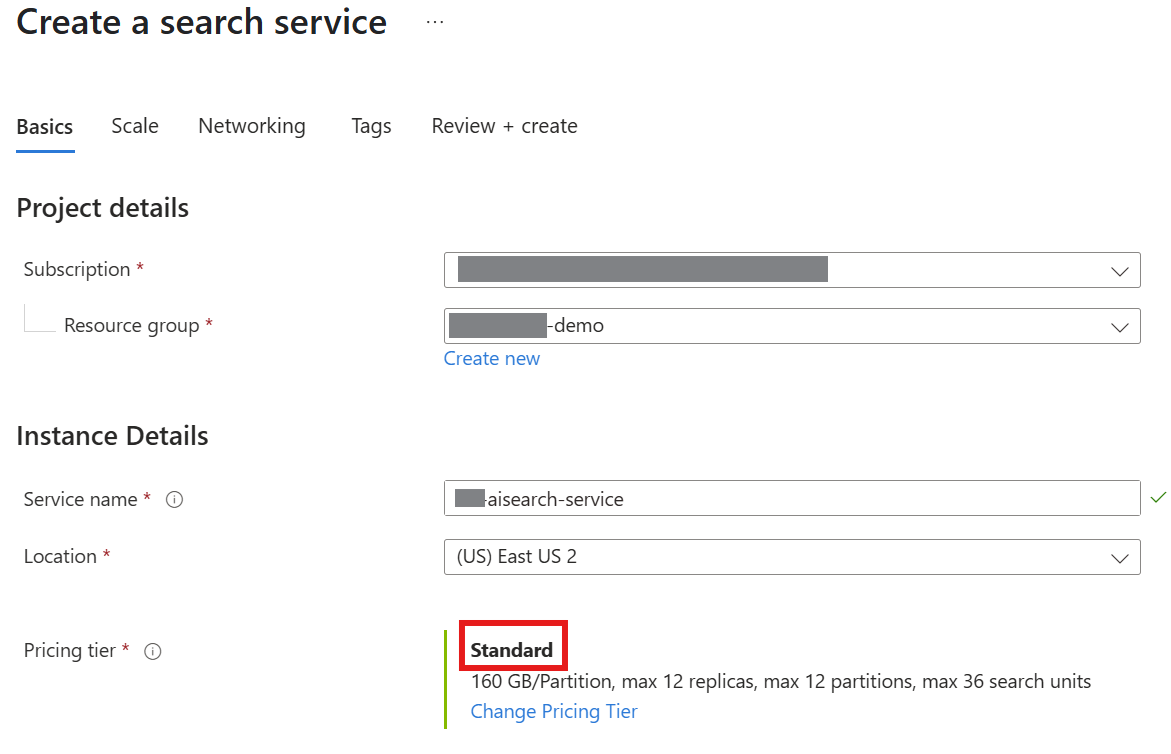

3. Navigate to your search service once it is created. Under Settings > Keys, ensure 'Both' is selected for API access control. Click save.

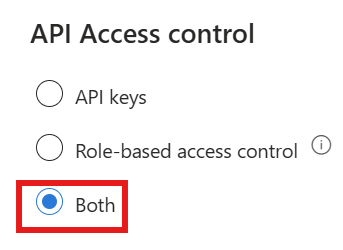

4. Navigate to Settings > Identity > turn on system-assigned identity and click save.

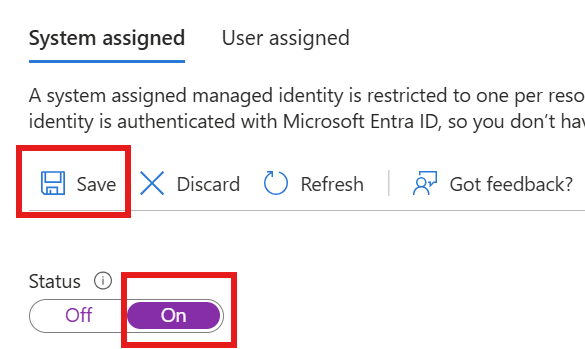

#### Step 3: Create model deployments in your AI project

1. In your AI Foundry project, under 'My assets' section, click on the 'Models + endpoints'.
2. Click on 'Deploy model' and 'Deploy base model'.
3. Select gpt-4o and then press **Confirm**.
4. Select **Customize** and set the **Model version** to 2024-08-06 and the **Tokens per Minute Rate Limit** to 200k.

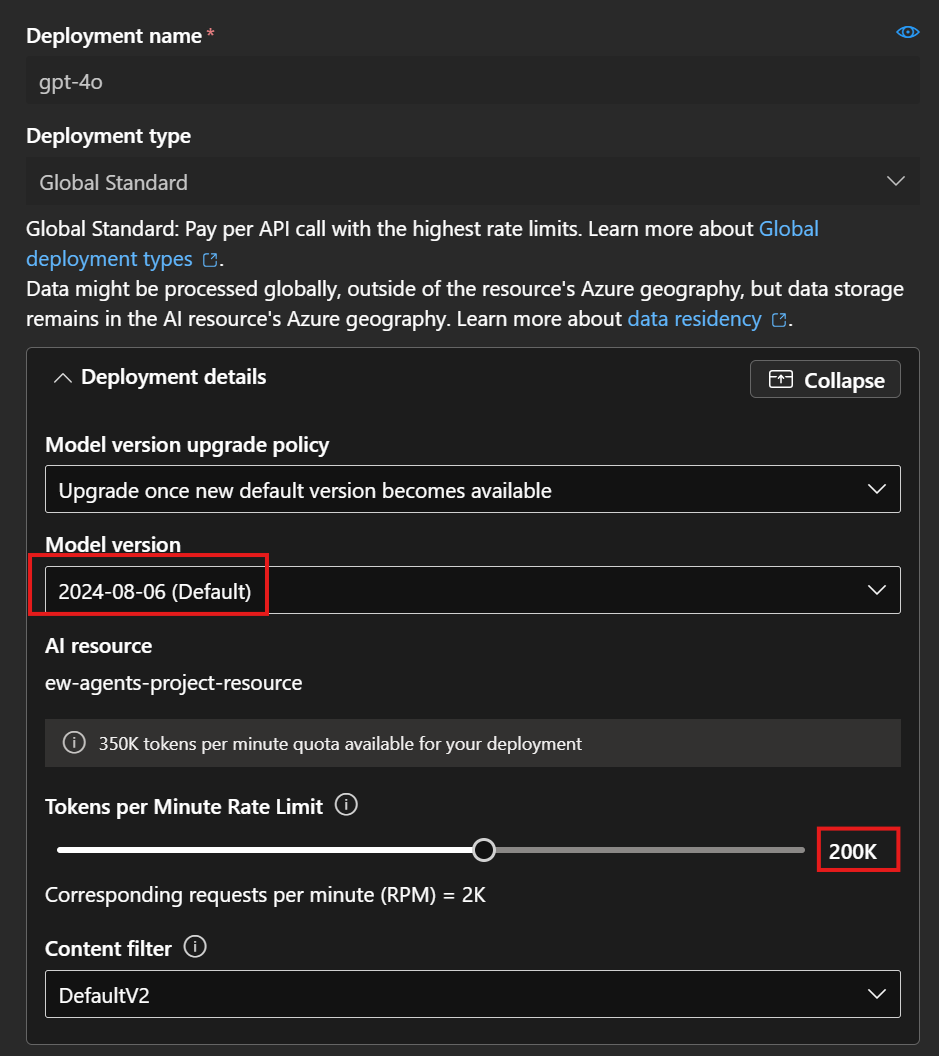

#### Step 4: Create an Azure OpenAI service and deploy an embedding model

The import and vectorize wizard in Azure AI Search, which will be used in subsequent labs, does not yet support text embedding models within your AI Foundry resource project. Because of this, we need to create an Azure OpenAI service and deploy a text embedding model there. We will use this text embedding model later to vectorize our health plan documents.

1. Navigate to the same resource group where you created your AI project and create a new Azure AI Search service resource.
2. Deploy an Azure OpenAI Service resource in this resource group.
3. In your newly created Azure OpenAI service, click Go to Azure AI Foundry portal. Notice that this is outside of your project.
4. Under the My assets section, click on the Models + endpoints.
5. Click on Deploy model and then Deploy base model.
6. Select text-embedding-3-large and deploy it. This will be used later to create the vector embeddings for our health plan documents.

#### Step 5: Create a Storage Container

We need to create a storage container to store our health plan documents in. This is where our Azure AI Search service will retrieve our health plan documents from. Navigate to the same resource group where you created your AI project and create a new Azure AI Search service resource.

![Sample Photo](images/create-SA.jpg)

#### Step 6: Create a Grounding with Bing Search service

Under the same resource group, create a Grounding with Bing Search service

#### Step 7: Assign necessary permissions

The following steps are needed for the AI search resource to be able to vectorize the health plan documents in Lab 4:

1. Navigate to the Storage Account you created. On the left pane, under **Access control**, assign the 'Storage Blob Data Reader role' to the search service identity:

![Sample Photo](images/blob-roleassign.jpg)

2. Navigate to your Azure AI Search resource. On the left pane, under **Access control**, assign the 'Search Index Data Reader' and 'Search Service Contributor' roles to your project's managed identity:

![Sample Photo](images/aisearch-role-assign1.png)

![Sample Photo](images/aisearch-role-assign2.jpg)

3. Navigate to your Azure OpenAI resource.
    1. Select **Access control**.

    2. Select **Add**, and then select **Add role assignment**.

    3. Under **Job function roles**, select Cognitive Services OpenAI User, and then select **Next**.

    4. Under **Members**, select Managed identity, and then select Members.

    5. Filter by subscription and resource type (search services), and then select the managed identity of your search service.

    6. Select Review + assign.


#### Step 5: Install dependencies, create a virtual environment, and create an environment variables file

1. Open a new terminal and navigate to the AZURE-AI-AGENTS-LABS project directory if you are not there already, which you cloned from GitHub. Run the below powershell commands to create and activate your virtual environment:
    
    ```powershell
    python -m venv venv
    venv/Scripts/activate
2. Still in the AZURE-AI-AGENTS-LABS project directory, run the below powershell command. This installs all the required packages:
    
    ```powershell
    pip install -r requirements.txt
3. Still in the AZURE-AI-AGENTS-LABS project directory, run the below powershell command. This creates your .env file:
    
    ```powershell
    cp sample.env .env
4. Update your newly created .env file with your environment variables
    1. Replace 'AIPROJECT_ENDPOINT' in your .env with your Azure AI Foundry project endpoint and 'API_KEY' with your API key, both of which can found in the the **Overview** page of your project:
    
    ![foundry-project-endpoint.jpg](images/foundry-project-endpoint.jpg)

    2. You also need to update 'CHAT_MODEL' in your .env with your gpt-4o model deployment name and update 'CHAT_MODEL_ENDPOINT' in your .env with your model endpoint, both of which can be found in the **Models + endpoints** under **My assets**. Click on the `gpt-4o` model that you have deployed and you will see these values:

    ![chat-model.jpg](images/chat-model.jpg)

5. Save .env file after updating.
6. Once your .env file is saved, click 'restart' at the top of this notebook to restart the kernel. This clears all variables, imports, and state from memory, and starts a fresh Python process, making sure our code is using the latest values.

    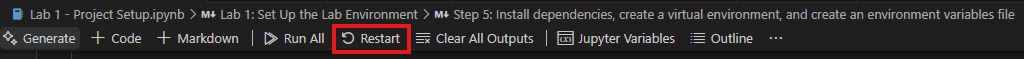

### Step 7: Login to your Azure subscription

In your terminal, run the below command to login to your Azure account. When prompted, select your subscription. This allows us to use the token-based authentication method, DefaultAzureCredential, which is required for subsequent labs. Key-based authentication, using the AzureKeyCredential method, may also work, but the code in the labs will need to be refactored accordingly.

az login

#### Step 8: Test your lab environment

To test that your lab was setup successfully, run the below code that sends a message to the deployed model, asking it to tell a joke.

In [ ]:
# Import packages
import os
from azure.ai.projects import AIProjectClient
from azure.core.credentials import AzureKeyCredential
from azure.identity import DefaultAzureCredential
from dotenv import load_dotenv

load_dotenv() # Load environment variables from .env file

True

##### Option #1 (preferred method): Using token-based authentication using DefaultAzureCredential

In [ ]:
project = AIProjectClient(
    endpoint=os.getenv("AIPROJECT_ENDPOINT"),
    credential=DefaultAzureCredential()
)

##### Option #2 (only use if token-based authentication is unavailable): Using key-based authentication with AzureKeyCredential

In [ ]:
#project = AIProjectClient(
#    endpoint=os.getenv("AIPROJECT_ENDPOINT"),
#    credential=AzureKeyCredential(os.getenv("API_KEY"))
#)

In [ ]:
# Chat with the gpt-4o model
chat = project.inference.get_chat_completions_client()
response = chat.complete(
    model=os.getenv("CHAT_MODEL"), # gpt-4o model from your project
    messages=[
        {
            "role": "system",
            "content": "You are an AI assistant that tells jokes for toddlers.",
        },
        {"role": "user", "content": "Hey, can you tell a joke about teddy bear?"},
    ],
)

print(response.choices[0].message.content)